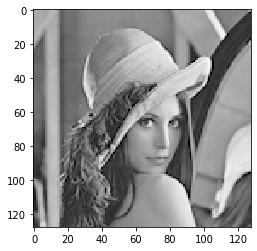

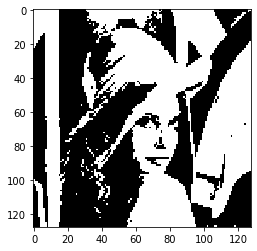

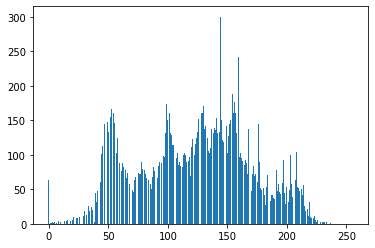


11111111111111100000000000000001111111111111111111111111111111111111111111010000011111111111111111111111110000000000000000000011
11111111111111100000000000000000111111111111111111111111111111111111110111100000011111111111111111111111110000000000000000000010
11111111111111100000000000000000011111111111111111111111111111111111110001000000001111111111111111111111111000000000000000011000
11111111111111100000000000000000011111111111111111111111111111111111100101110000001111111111111111111111111000000000000000110000
11111111111111100000000000000000111111111111111111111111111111111110110011110000000111111111111111111111111100000000000011100000
11111111111111100000000000000000011111111111111111111111110111111111100001010000000111111111111111111111111100000000001111000000
11111111111111100000000000000000101111111111111111000000000011111110000000010000000111111111111111111111111110000000000110000000
111111111111111000000000000000000000011111111111110000000000111111000100000100000001111111111111

00000000111111110000000000000000000000000001000000111000000111111111111111111111111110000000110000011111111111111111011111111111
00000000111111110000000000000000000000000000100000111000001111111111111111001111111110000000110000011111111111111111111111111111
00000000111111110000011000000001000000000010000001110000001111111111111111001111111110000000110000011111111111111111111111111111
00000000111111110001110000000000000000000011000001100000001111111111111111001111111110000000110000111111111111111111111111111111
00000000111111110000000000000001000000000000000011100000000111111111111101001111111110000000010000111111111111111111111111111111
00000000111111110000000000000000000000000000001111000000000111111111111001110111111100000000011000111111111111111111111111111111
00000000111111110000000000000000000000000000001110000000000111111111111010000111111100000000011001111111111111111111111111111111
0000000011111111000000000000000010000000000001111000000000011111111111110000001111110000000001100

0000000222222220000000000000000044000000000024242424242424240024242424242424242424242424242424242424242424242424242424240055555550000000555555000000000000000373737373737373737
00000002222222200000000000000004444000000000024242424242424002424242424242424242424242424242424242424242424242424242424240055555550000005555555000000000000000373737373737373737
0000000222222220000000000000000444400000000057000242400024242424242424242424242424242424242424242424242424242424242424240555555500005555555555000000000000037373737373737373737
000000022222222000000000000000044440000000061000242400024242424242424242424242424242424242424242424242424242424242424242400555555000555555555550000000000003737373737373737373737
0000000222222220000000000000004444440000000000024242400555555555555555555555555555555555555555550005555555555550000000000003737373737373737373737
000000022222222000000000000000444444000000000070000055555555555555555555555555555555555555555505555555555555500000000000373737373737373737373737
00

24400000002412412412412412412412410241241000000000000000000002312310000000000000000000000015915915915915915915915915915915915915915915915915915915915915900000000037373737373737370000000000373737373737373700000000
24424424400000241241241241241241241241241241000000000000000000024724700000000000000000000000000159159159159159159159159159159159159159159159159159159159159159000000003737373737373737370000002480037373737373737000000000
24424424424400002412412412412412412412412410000000000000000000024724724700000000000000000000000001591591591591591591591591591591591591591591591591591591591591591590000000373737373737373737373700002480373737373737370000000000
02442442442440002412412412412412412412412410000000000000000000002472470025000000000000000000000015915915915915915915915915915915915915915915915915915915915915915915915900000373737373737373737373737370002480373737373737370000000000
0024424424400024124124124124124124124124100000000000000000000000253002542540000000000000000001591591591591591591

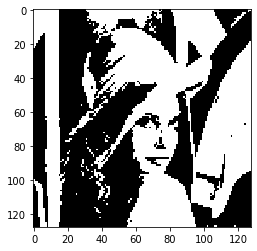

In [14]:
import cv2
import math, sys
import matplotlib.pyplot as plt
from PIL import Image

'''
savefig sould be done before show
see: https://blog.csdn.net/u010099080/article/details/52912439
'''

####### hist part ########
def img_hist(img_in):    
    hist = []
    for i in range(256):
        hist.append(0)
    
    row, col= img_in.shape
    for i in range(0, row):
        for j in range(0, col):
            hist[img_in[i, j]] += 1
    
    plt.bar(range(0, 256), hist)
    plt.savefig('histogram.png') 
    plt.show()
    return 0

####### binarize part ######
def img_binarize(img_in):
    return (img_in > 0x7f) * 0xff

########## IO ##############
img = cv2.imread('lena.bmp', 0)
#plt.imshow(img, cmap = 'gray')
#plt.show()

img_binarized = img_binarize(img)
#plt.imshow(img_binarized, cmap = 'gray')
plt.savefig('lena_binarized.png', cmap = 'gray')
#plt.show()

img_hist(img)

######### CC part ##########
parent_label = []
img_binarized = (img_binarized == 0xff) * 1
cc_img = cv2.resize(img_binarized, (128, 128), interpolation = cv2.INTER_CUBIC)

def union_find(label):
    original_label = label
    while label != parent_label[label]:
        label = parent_label[parent_label[label]]
        
    parent_label[original_label] = label # path compression to avoid TLE
    return label
            
def draw_rect(img, left, right, top, bottom, color):
    return 0

def draw_cent():
    return 0

def connected_components():
    # set parent label
    # plt.imshow(cc_img, cmap = 'gray')
    row, col = cc_img.shape
    for i in range(row * col):
        parent_label.append(i)
    
    # do connected components
    label = 2
    for i in range(row):
        print()
        for j in range(col):
            print(cc_img[i, j], end = '')
            
    for i in range(row):
        for j in range(col):
            ok1 = 0
            ok2 = 0
            if cc_img[i, j] == 1:
                if j - 1 >= 0 and cc_img[i, j - 1] > 1: # left has already labeled
                    #print(i, j, 'type 1,', end = '')
                    cc_img[i, j] = cc_img[i, j - 1]
                    ok1 = 1
                    
                if i - 1 >= 0 and cc_img[i - 1, j] > 1: # up has already labeled
                    #print(i, j, 'type 2,', end = '')
                    if ok1: # set the connected component to make left = up
                        parent_label[cc_img[i, j]] = parent_label[cc_img[i - 1, j]]
                    else:
                        cc_img[i, j] = cc_img[i - 1, j] # just set as the same label as above
                    
                    ok2 = 1
                if ok2 == 0 and ok1 == 0:
                    #print(i, j, 'type 3,', end = '')
                    cc_img[i, j] = label
                    label += 1
        #print()
    
    '''
    for i in range(row):
        print()
        for j in range(col):
            print(cc_img[i, j], end = '')
            
    for i in range(row):
        print()
        for j in range(col):
            print(cc_img[i, j], end = '')
    '''
    
    # union and find merging
    for i in range(row):
        #print()
        for j in range(col):
            if cc_img[i, j] > 1:
                #print('%d par--> %d,' %(cc_img[i, j], union_find(cc_img[i, j])), end = '')
                cc_img[i, j] = union_find(cc_img[i, j])
        
        
    for i in range(row):
        print()
        for j in range(col):
            print(cc_img[i, j],' ', end = '')

    mymap = []
    for i in range(0, row * col):
        mymap.append(0)
        
    for i in range(0, row):
        for j in range(0, col):
            mymap[cc_img[i, j]] += 1
    
    for i in range(len(mymap)):
        if mymap[i] > 500:
            print(i, mymap[i])
    label_position = []
    
    
connected_components()
print('finished all image processing')